In [1]:
# Feature extraction - data compression with goal of maintaining most of the relevant information
#                    - project data onto new feature space
#                    - improve computational efficiency but also help reduce curse of dimensionality

# Principal component analysis (PCA):
# - unsupervised linear transformation technique
# - find directions of maximum variance in high-dimensional data and projects it onto new subspace with equal or fewer
# dimensions than the original one.
# - orthogoal axes (principal components) - directions of maximum variance given constraint that new features 
# orthogonal to each other
# - Steps:
# 1. Standardize the d-dimensional dataset.
# 2. Construct the covariance matrix.
# 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
# 4. Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new
# feature subspace (k <= d).
# 5. Construct a projection matrix W from the "top" k eigenvectors.
# 6. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional
# feature subspace

In [2]:
# wine dataset
import pandas as pd 
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
# process idata into training and test sets and standardize to unit variance
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
                train_test_split(X, y,
                                 test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/home/shunji/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# covariance - measure of joint variability of two random variables
# - positive means features increase or decrease together, negative means features vary in opposite directions
# Eigenvectors of covariance matrix represents principle components (directions of maximum variance)
# Corresponding eigenvalues define their magnitude

import numpy as np
cov_mat = np.cov(X_train_std.T) # covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # eigen decomposition
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


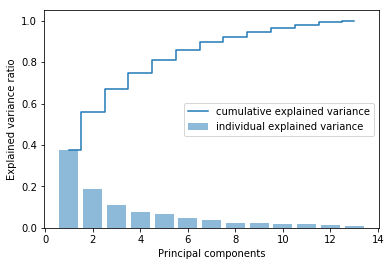

In [5]:
# Variance explained ratios of eigenvalues = franction of eigenvalue over sum of total eigenvalues
%matplotlib inline

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [6]:
# Feature transformation
# Transformt he wine dataset onto new principal component axes

# Sort eigenpairs in decreasing order of eigenvalues
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [7]:
# Collect two eigenvectors that correspond to two largest values to caputre 60 percent of the variance in dataset
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], # np.newaxis adds another dimension (1d to 2d)
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [8]:
# we created a 13 x 2 dimensional projection matrix W
# project a sample x into x', x' = xW
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [9]:
# Transform entire 124 x 13 - dimensional training dataset onto 2 principal components by calculating 
# the matrix dot product
# X' = XW
X_train_pca = X_train_std.dot(w)

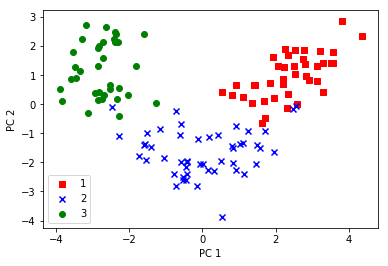

In [10]:
# Visualize transformed wine training set, stored as 124 x 2 - dimension matrix
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# data is more spread along x-axis (first principal component) than y-axis (second principal component)
# linear classifier will separate the classes well

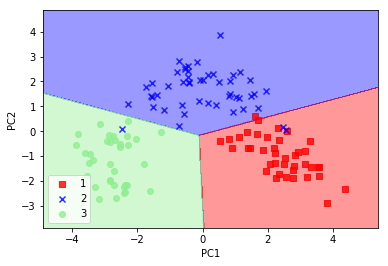

In [11]:
# PCA in scikit-learn
from plot_decision_regions import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()


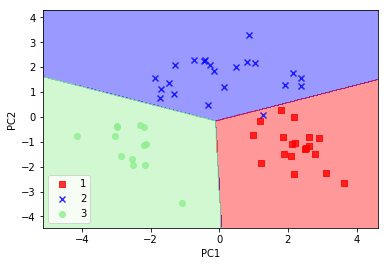

In [12]:
# plot decision regions on transformed test dataset
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [13]:
# Explained variance ratios
pca = PCA(n_components=None) # keep all principal components
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

In [14]:
# Supervised data compression via linear discriminant analysis (LDA)

# featre extraction technique to increase computational efficiency and reduce degree of over-fittng due to 
# curse of dimensionality in nonregularized models

# LDA finds the feature subspace that optimizes class seperability
# Assumptions:
# - data is normally distributed
# - classes have identcal covariance matrices
# - features are statistically independent of each other

# LDA steps:
# 1. Standardize the d-dimensional dataset (d = no. of features)
# 2. For each class, compute the d-dimensional mean vector.
# 3. Constrcut the between-class scatter matrix Sb and within-class scatter matrix Sw
# 4. Compute the eigenvectors and corresponding eigenvalues of the matrix Sw^(-1)Sb
# 5. Choose k eigenvectors that correspond to k largest eigenvalues to construct d x k-dimensional matrix W;
#   the eigenvectors are the columns of this matrix
# 6. Project the samples onto the new feature subspace using the transformation matrix W.

In [19]:
# Computing the scatter matrices

# compute mean vector
# Each mean vector stores the mean feature value with respect to the sample class i
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0)) # mean across columns (features)
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))
          

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [27]:
# compute the within class scatter matrix Sw
# Sw = sum of Si
# Si is the individual scatter matrices of each class i
# https://en.wikipedia.org/wiki/Scatter_matrix

d = 13 # number of features
S_W = np.zeros((d, d)) # 13 by 13 matrix
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1) # change to column vec
        class_scatter += (row-mv).dot((row-mv).T)
        S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [28]:
# assumption is that class labels in training set uniformly distributed
# not true in this case:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


In [29]:
# Scale individual scatter matrices si before summing them to Sw
# divide the scatter matrices by number of class samples -> same as computing covariance matrix
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [40]:
# Calculate between class scatter matrix (compare against overall mean m - includes samples of all classes)
mean_overall = np.mean(X_train_std, axis = 0) # mean across columns (features)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [ ]:
# Selecting linear discriminants for the new feature subspace